In [6]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [7]:
trainData = pd.read_csv('Data/train_u6lujuX_CVtuZ9i.csv')

In [9]:
trainData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
trainData.shape

(614, 13)

In [11]:
trainData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
trainData.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#Handling with missing data

In [15]:
trainData['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [5]:
trainData.Gender.fillna('Male',inplace =True)

In [11]:
trainData['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
trainData.Married.fillna('Yes',inplace=True)

In [13]:
trainData['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
trainData.Credit_History.fillna(1.0,inplace=True)

In [15]:
trainData.LoanAmount.fillna(trainData.LoanAmount.mean(),inplace=True)

In [16]:
trainData.Loan_Amount_Term.fillna(trainData.Loan_Amount_Term.mean(),inplace=True)

In [17]:
trainData['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
trainData.Self_Employed.fillna('No',inplace=True)

In [19]:
trainData['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
trainData.Dependents.fillna(0,inplace=True)

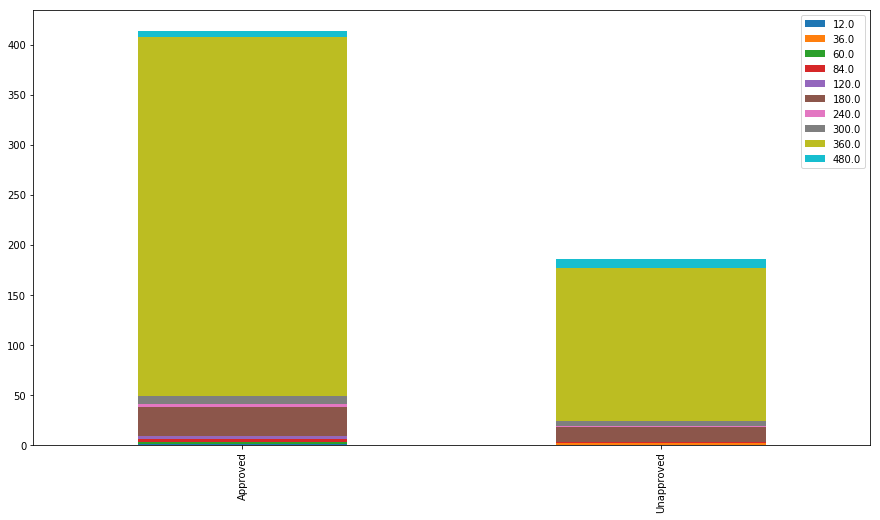

In [10]:
approved_term = trainData[trainData['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = trainData[trainData['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

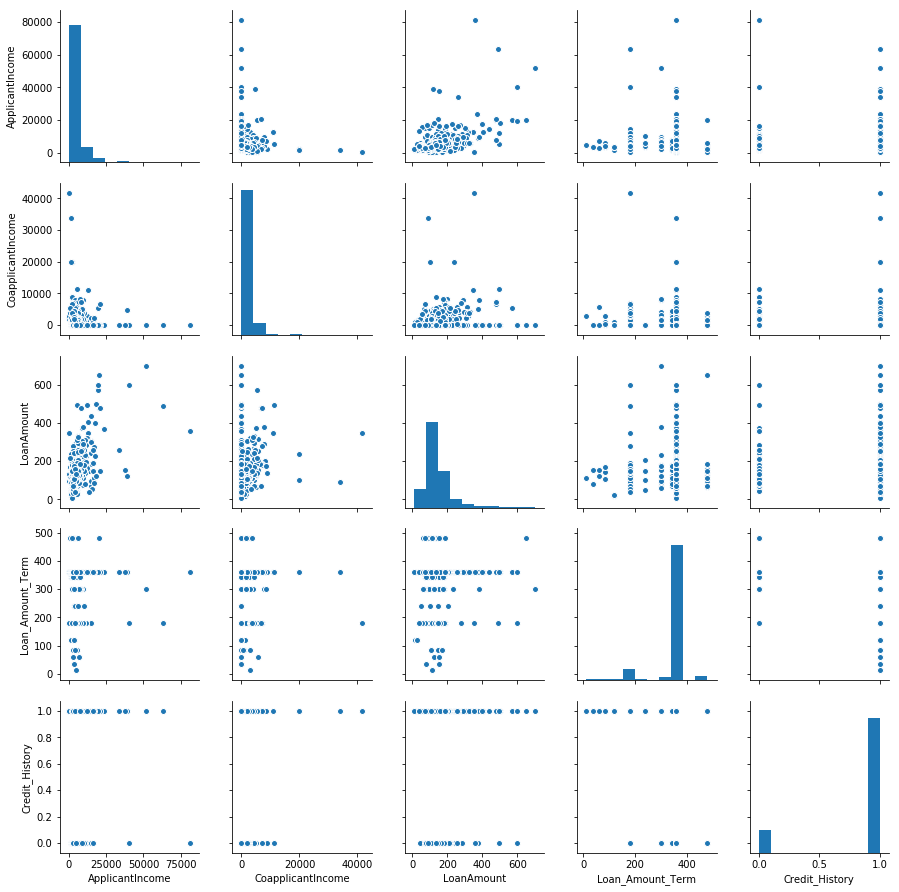

In [23]:
sns.pairplot(trainData)

C:\Users\Nikhil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


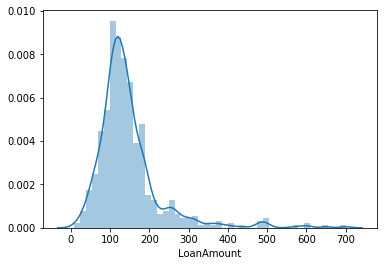

In [24]:
sns.distplot(trainData['LoanAmount'])

C:\Users\Nikhil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


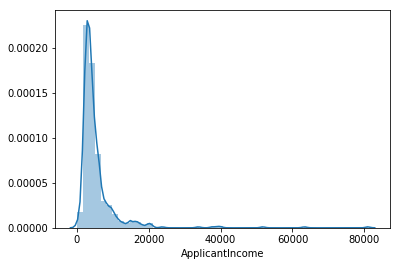

In [25]:
sns.distplot(trainData['ApplicantIncome'])

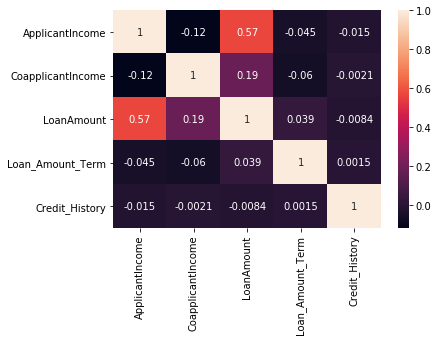

In [17]:
sns.heatmap(trainData.corr(),annot=True)

In [27]:
#Convert string values to numerical values because to algorithm can understand only numerical value not string values

In [24]:
trainData.Gender.value_counts()
gender_cat = pd.get_dummies(trainData.Gender,prefix='gender').gender_Female

In [29]:
trainData.Married.value_counts()
married_category = pd.get_dummies(trainData.Married,prefix='marriage').marriage_Yes

In [31]:
trainData.Education.value_counts()
graduate_category = pd.get_dummies(trainData.Education,prefix='education').education_Graduate

In [32]:
trainData.Self_Employed.value_counts()
self_emp_category = pd.get_dummies(trainData.Self_Employed,prefix='employed').employed_Yes

In [33]:
loan_status = pd.get_dummies(trainData.Loan_Status,prefix='status').status_Y

In [34]:
property_category = pd.get_dummies(trainData.Property_Area,prefix='property')

In [35]:
trainData.shape

(614, 13)

In [25]:
trainNew = pd.concat([trainData,gender_cat,married_category,graduate_category,self_emp_category,loan_status,property_category],axis=1)

NameError: name 'married_category' is not defined

In [37]:
trainNew.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,gender_Female,marriage_Yes,education_Graduate,employed_Yes,status_Y,property_Rural,property_Semiurban,property_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,Urban,Y,0,0,1,0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,Rural,N,0,1,1,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,Urban,Y,0,1,1,1,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,Urban,Y,0,1,0,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,Urban,Y,0,0,1,0,1,0,0,1


In [38]:
trainNew.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'gender_Female', 'marriage_Yes', 'education_Graduate', 'employed_Yes',
       'status_Y', 'property_Rural', 'property_Semiurban', 'property_Urban'],
      dtype='object')

In [40]:
feature_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','gender_Female','marriage_Yes','education_Graduate','employed_Yes','property_Rural','property_Semiurban','property_Urban']

In [41]:
X = trainNew[feature_columns]

In [42]:
y =  trainNew['status_Y']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: status_Y, dtype: uint8

In [43]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=42)

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
X_train.shape

(607, 12)

In [45]:
X_test.shape

(7, 12)

In [169]:
#Import test data and do real test of our model

In [46]:
testData = pd.read_csv('Data/test_Y3wMUE5_7gLdaTN.csv')

In [47]:
testData.shape

(367, 12)

In [48]:
testData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [49]:
testData.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
testData['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [51]:
testData.Gender.fillna('Male',inplace =True)

In [52]:
testData['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [53]:
testData.Married.fillna('Yes',inplace=True)

In [54]:
testData['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [55]:
testData.Credit_History.fillna(1.0,inplace=True)

In [56]:
testData.LoanAmount.fillna(testData.LoanAmount.mean(),inplace=True)

In [57]:
testData.Loan_Amount_Term.fillna(testData.Loan_Amount_Term.mean(),inplace=True)

In [58]:
testData['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [59]:
testData.Self_Employed.fillna('No',inplace=True)

In [60]:
testData['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [61]:
testData.Dependents.fillna(0,inplace=True)

In [62]:
gender_cat = pd.get_dummies(testData.Gender,prefix='gender').gender_Female
married_category = pd.get_dummies(testData.Married,prefix='marriage').marriage_Yes
graduate_category = pd.get_dummies(testData.Education,prefix='education').education_Graduate
self_emp_category = pd.get_dummies(testData.Self_Employed,prefix='employed').employed_Yes
property_category = pd.get_dummies(testData.Property_Area,prefix='property')

In [63]:
testDataNew = pd.concat([testData,gender_cat,married_category,graduate_category,self_emp_category,property_category],axis=1)

In [64]:
X_testData = testDataNew[feature_columns]

In [65]:
X_testData.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_Female,marriage_Yes,education_Graduate,employed_Yes,property_Rural,property_Semiurban,property_Urban
0,5720,0,110.0,360.0,1.0,0,1,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,0,0,0,0,0,1


In [66]:
#Solve using logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
logREg_predict =logReg.predict(X_test)
accuracy_score(y_test,logREg_predict)

1.0

In [68]:
logReg_y_prediction_class = logReg.predict(X_testData)

In [69]:
logRegPredictionFormat = ["Y" if i == 1 else "N" for i in logReg_y_prediction_class ]

In [70]:
#saving the results

In [73]:
pd.DataFrame({'Loan_ID':testData.Loan_ID,'Loan_Status':logRegPredictionFormat}).to_csv('Data/log.csv',index=False)